Author: Hamid Nemati

Email: nemati.hamid.1998@gmail.com

# Reading The Dataset

In [11]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv('../input/lending-club-20072020q1/Loan_status_2007-2020Q3.gzip', low_memory=False, index_col=0)

In [13]:
# Question Requirements
data.drop(['grade', 'sub_grade'], axis=1, inplace=True)
data = data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Run a quick analysis of the data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

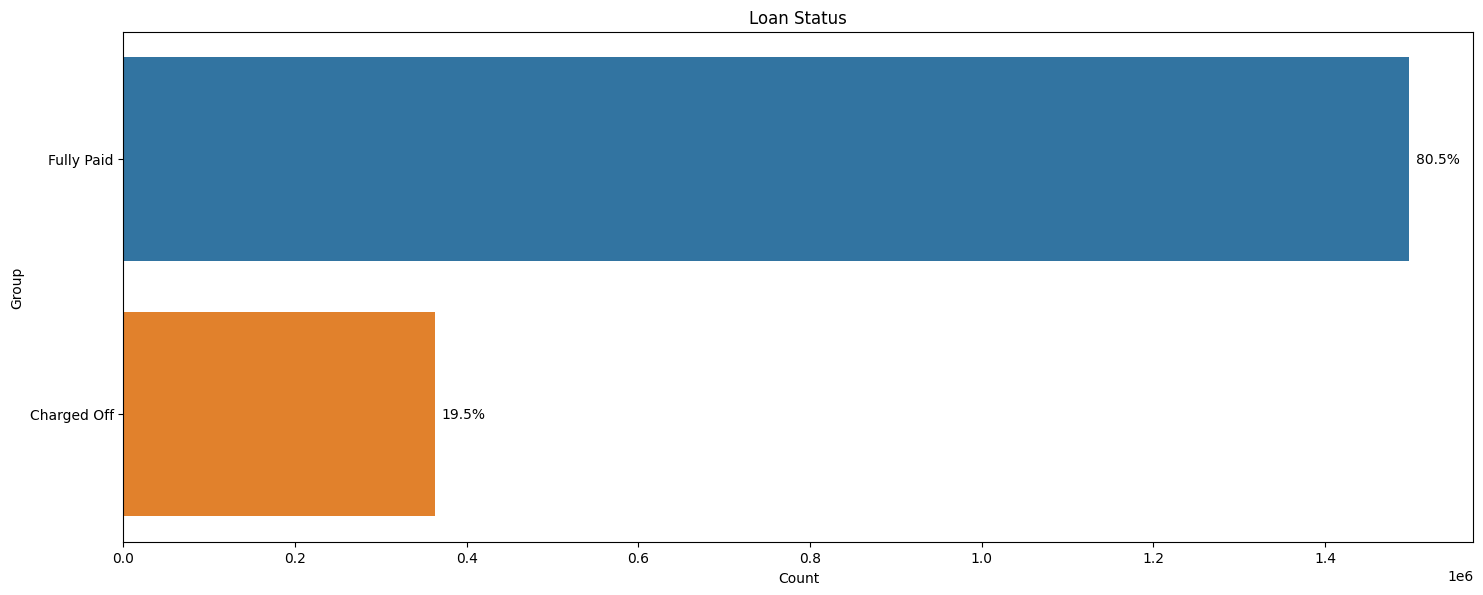

In [5]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size for better readability
ax = sns.countplot(y='loan_status', data=data, orient='h')

plt.subplots_adjust(left=0.15, right=1.5, top=0.95, bottom=0.1)

# Calculate and annotate the percentages
total = len(data)
for p in ax.patches:
    count = p.get_width()
    percentage = f'{100 * count / total:.1f}%'
    x = count
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), xytext=(5, 0), textcoords='offset points', va='center')


# Add title and labels
plt.title('Loan Status')
plt.xlabel('Count')
plt.ylabel('Group')

# Show the plot
plt.show()

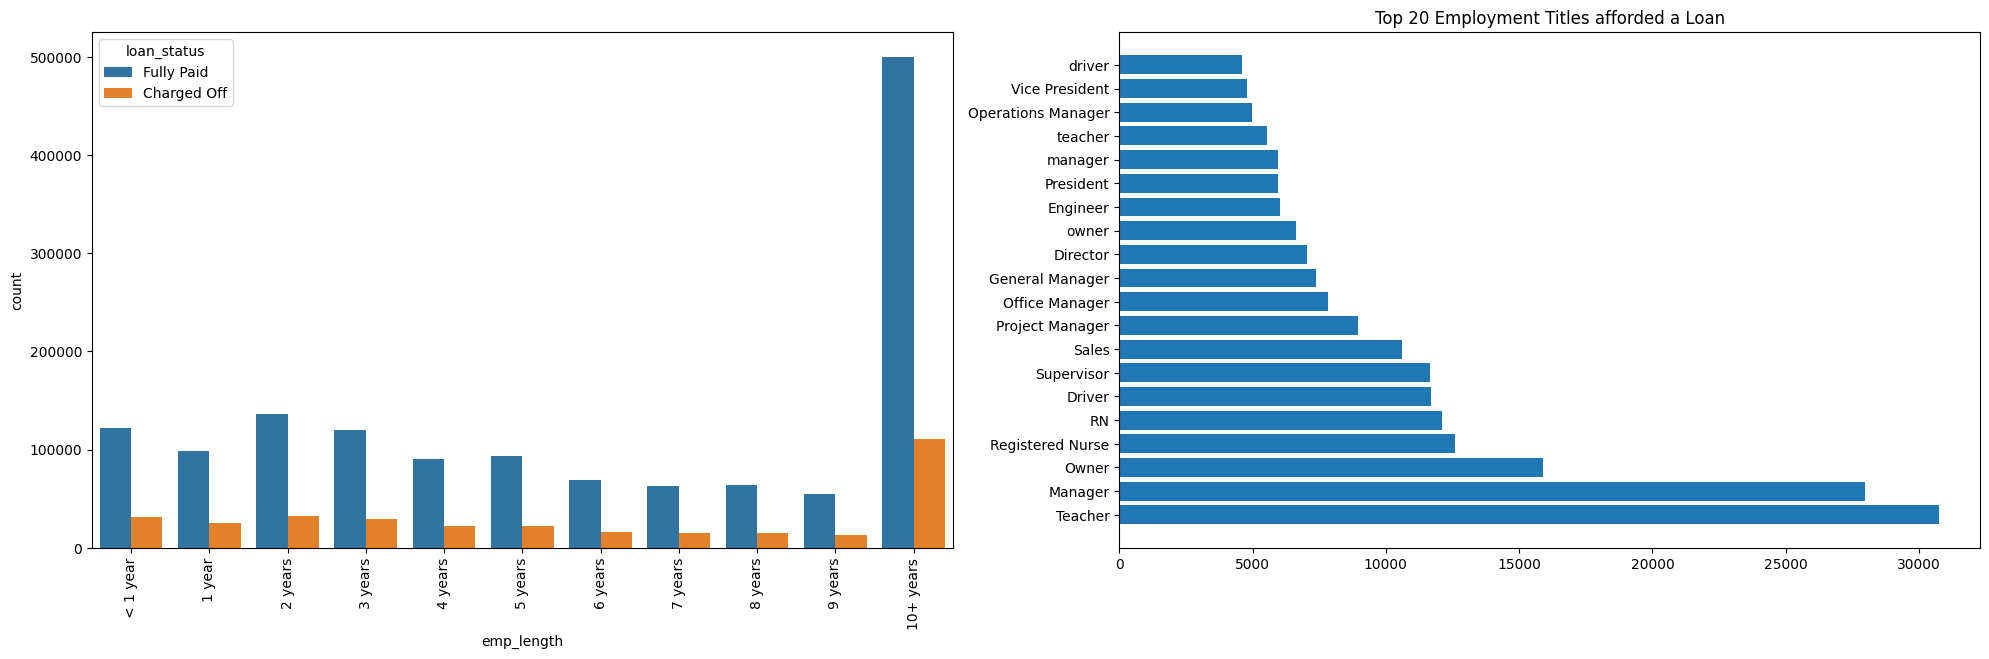

In [6]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
g = sns.countplot(data=data, x='emp_length', hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplot(2, 2, 2)
plt.barh(data['emp_title'].value_counts()[:20].index, data['emp_title'].value_counts()[:20])
plt.title("Top 20 Employment Titles afforded a Loan")
plt.tight_layout()

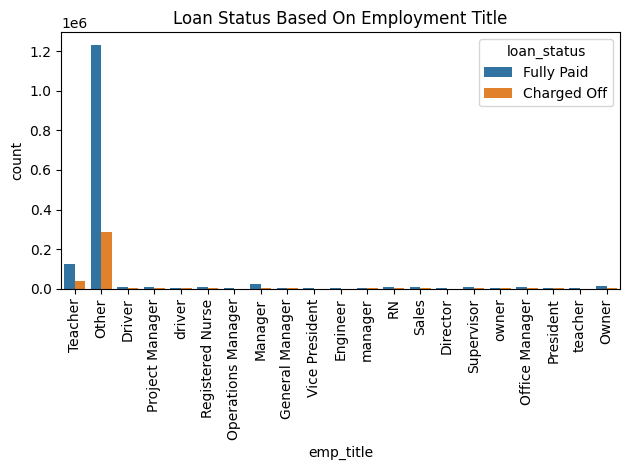

In [7]:
# Calculate the top 20 most common 'emp_title'
popular_emp = data['emp_title'].value_counts().nlargest(20).index

# Fill missing values with the mode of 'emp_title'
data['emp_title'] = data['emp_title'].fillna(data['emp_title'].mode()[0])

# Replace non-popular 'emp_title' with 'Other'
data['emp_title'] = data['emp_title'].apply(lambda x: x if x in popular_emp else 'Other')

# Plot using seaborn
sns.countplot(data=data, x='emp_title', hue='loan_status')
plt.title("Loan Status Based On Employment Title")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

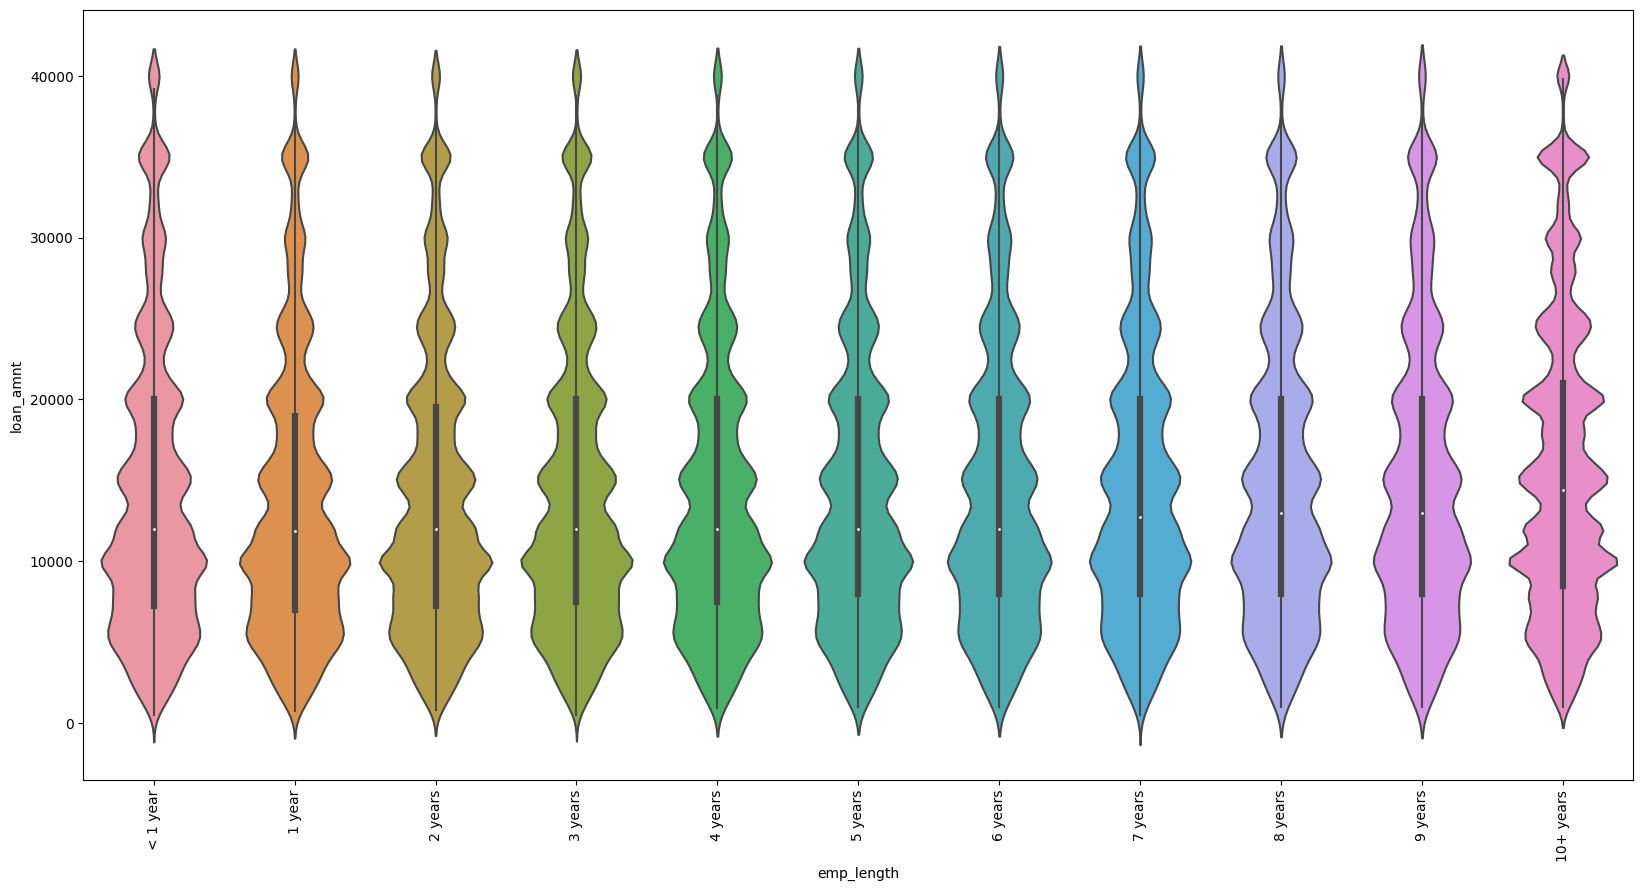

In [8]:
plt.figure(figsize=(20, 10))
g = sns.violinplot(data=data, x="emp_length", y="loan_amnt", order=order);
g.set_xticklabels(g.get_xticklabels(), rotation=90);

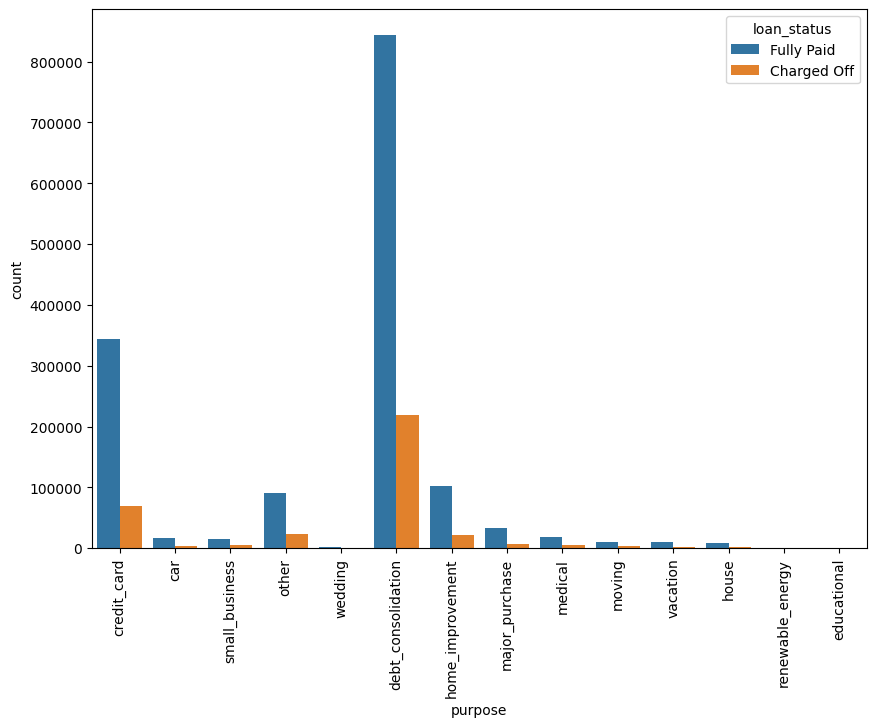

In [9]:
plt.figure(figsize=(10, 7))
g = sns.countplot(data, x='purpose', hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

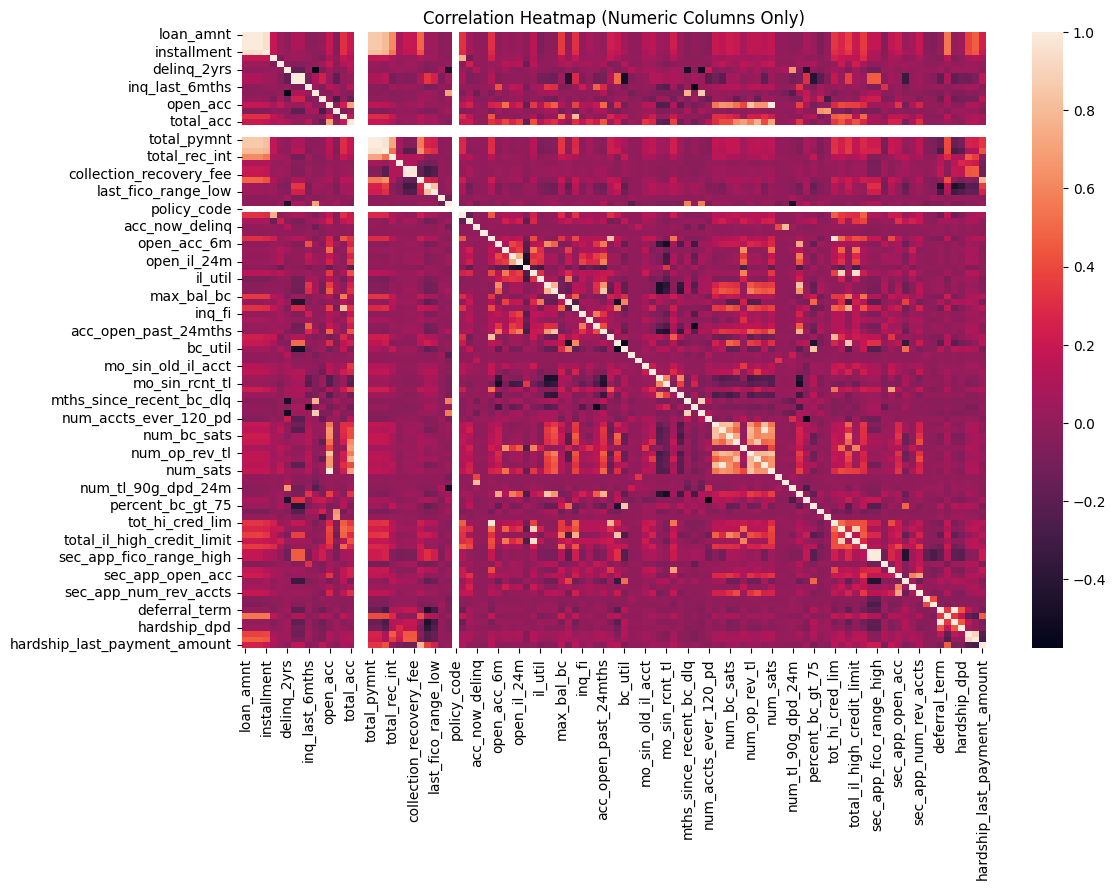

In [10]:
# Create a heatmap for the correlation matrix
numeric_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f")

plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

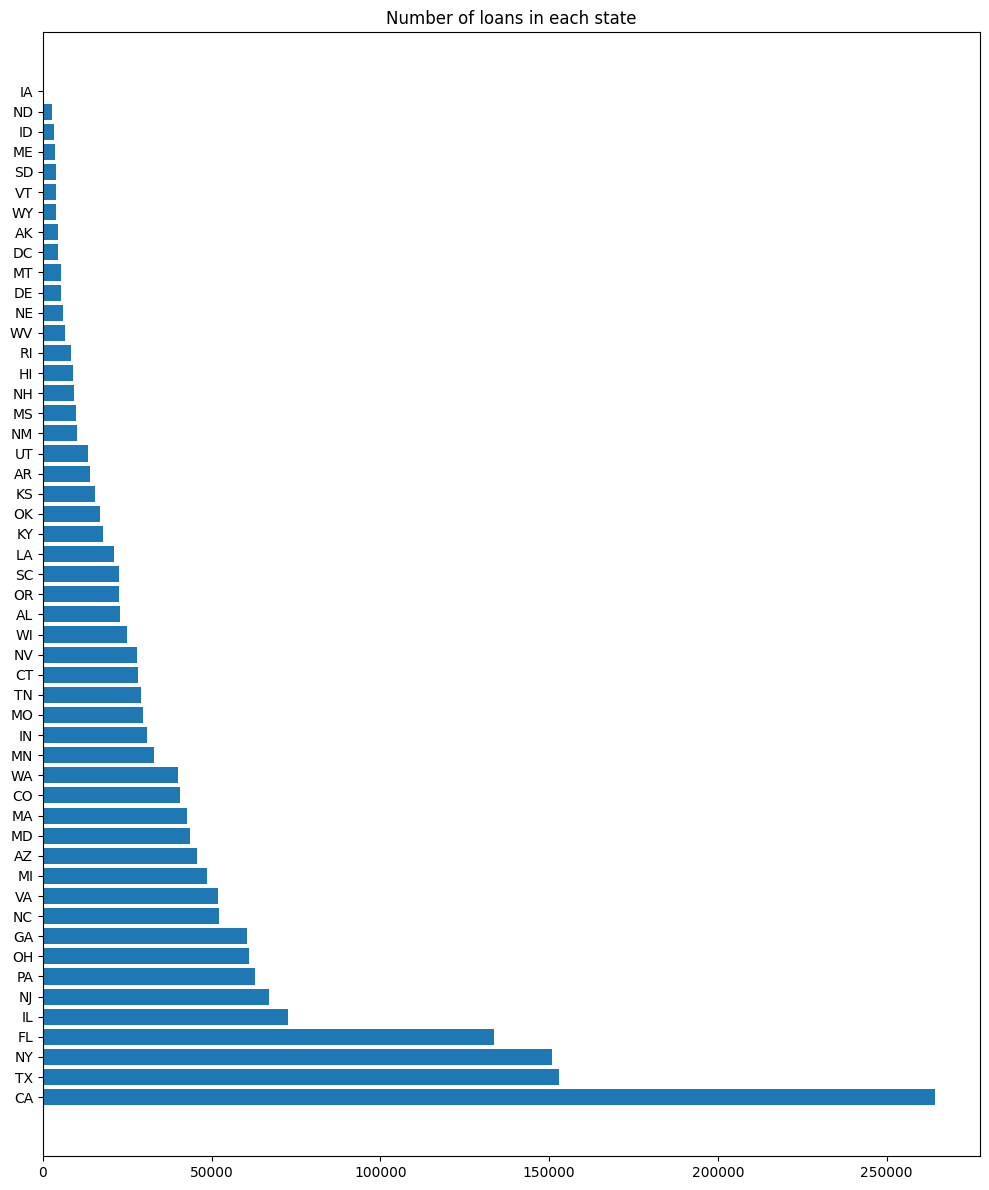

In [11]:
plt.figure(figsize=(10, 12))
plt.barh(data['addr_state'].value_counts().index, data['addr_state'].value_counts())
plt.title("Number of loans in each state")
plt.tight_layout()

Beside california, most of the the comstomers are from east coast

/tmp/ipykernel_33/637176397.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loan_amnt, kde=False, bins=50);


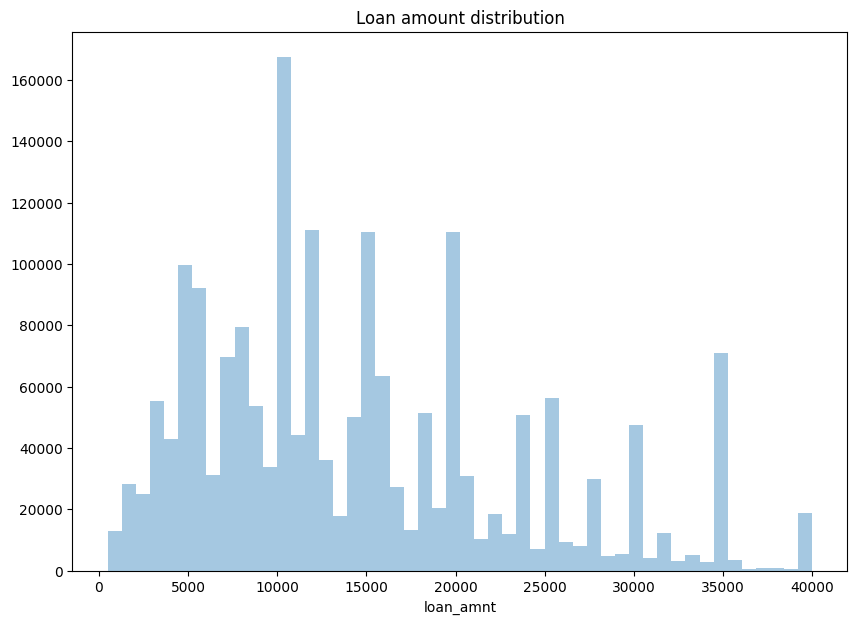

In [12]:
plt.figure(figsize=(10, 7));
sns.distplot(data.loan_amnt, kde=False, bins=50);
plt.title('Loan amount distribution');

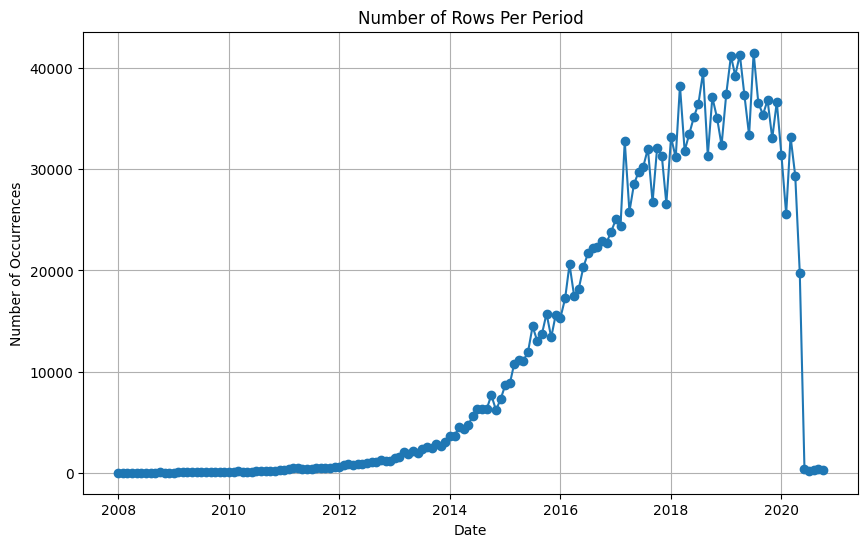

In [13]:
# Step 1: Convert the date column from a string to a datetime object
temp = pd.to_datetime(data['last_pymnt_d'], format='%b-%Y')

# Step 2: Count the number of occurrences for each period
data_counts = temp.value_counts().sort_index()

# Step 3: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data_counts.index, data_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Number of Rows Per Period')
plt.grid(True)
plt.show()

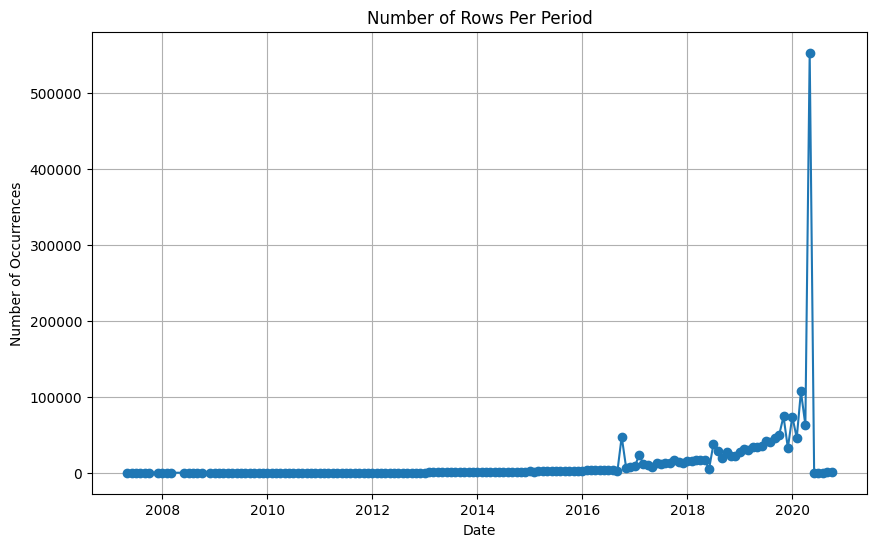

In [14]:
# Step 1: Convert the date column from a string to a datetime object
temp = pd.to_datetime(data['last_credit_pull_d'], format='%b-%Y')

# Step 2: Count the number of occurrences for each period
data_counts = temp.value_counts().sort_index()

# Step 3: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data_counts.index, data_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Number of Rows Per Period')
plt.grid(True)
plt.show()

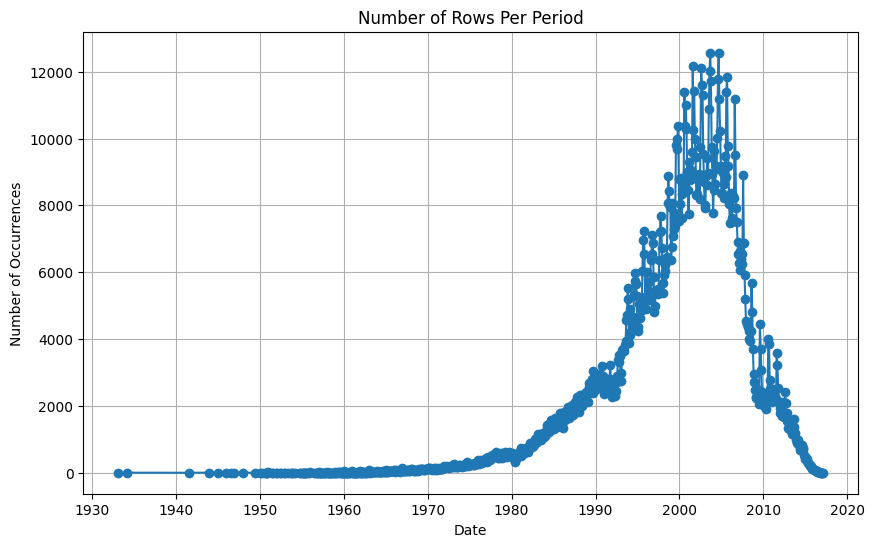

In [15]:
# Step 1: Convert the date column from a string to a datetime object
temp = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')

# Step 2: Count the number of occurrences for each period
data_counts = temp.value_counts().sort_index()

# Step 3: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data_counts.index, data_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Number of Rows Per Period')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Home Ownership by Loan Status')

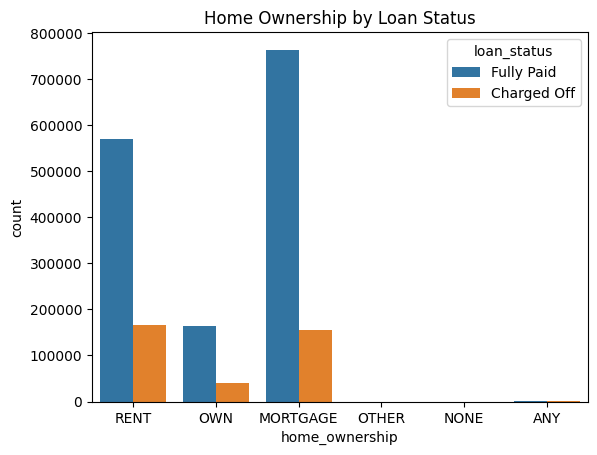

In [10]:
sns.countplot(data, x='home_ownership', hue='loan_status')
plt.title('Home Ownership by Loan Status')

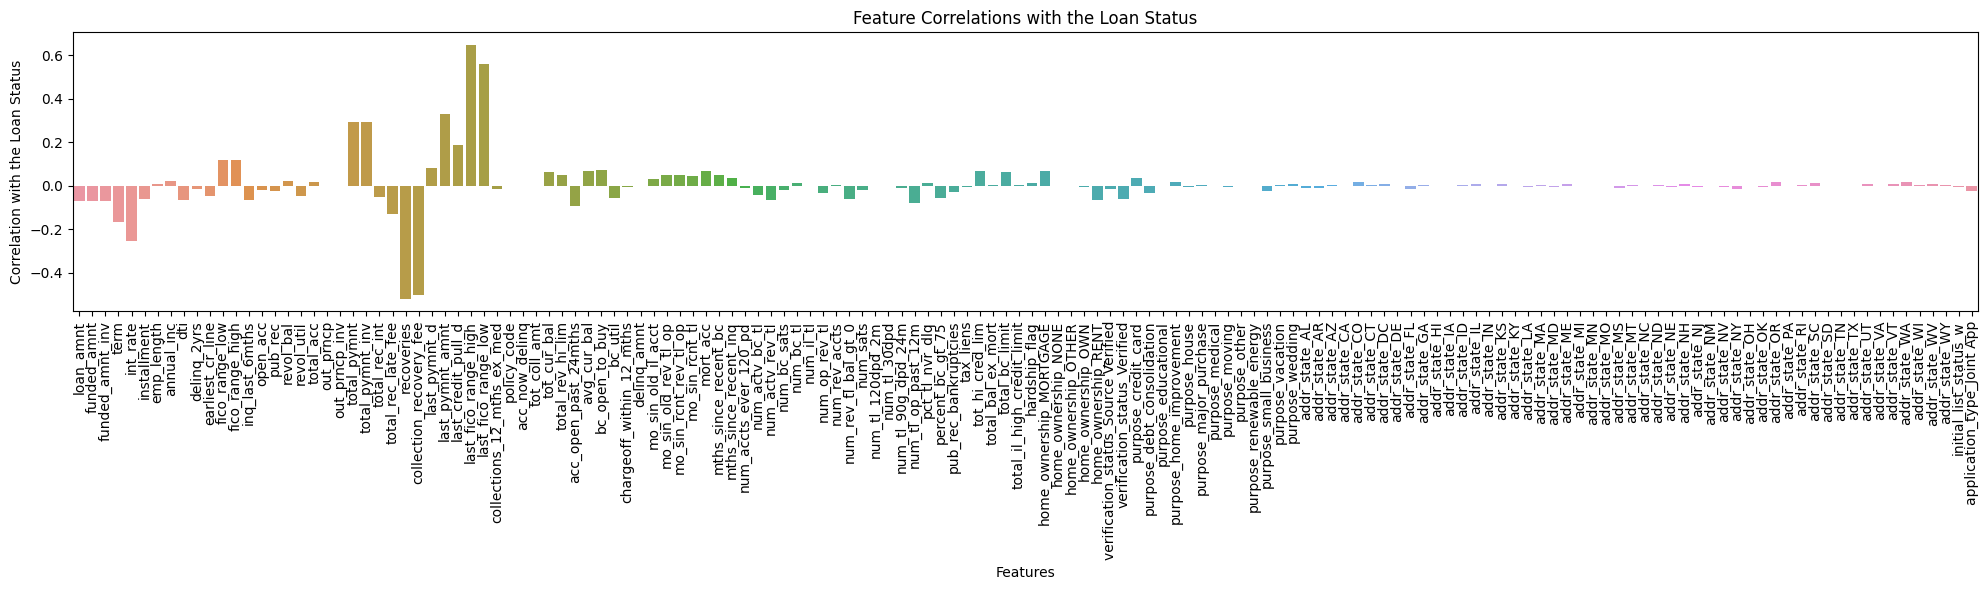

In [45]:
correlations = data.corr()['loan_status'].drop('loan_status')

plt.figure(figsize=(20, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with the Loan Status')
plt.title('Feature Correlations with the Loan Status')
plt.tight_layout()
plt.show()

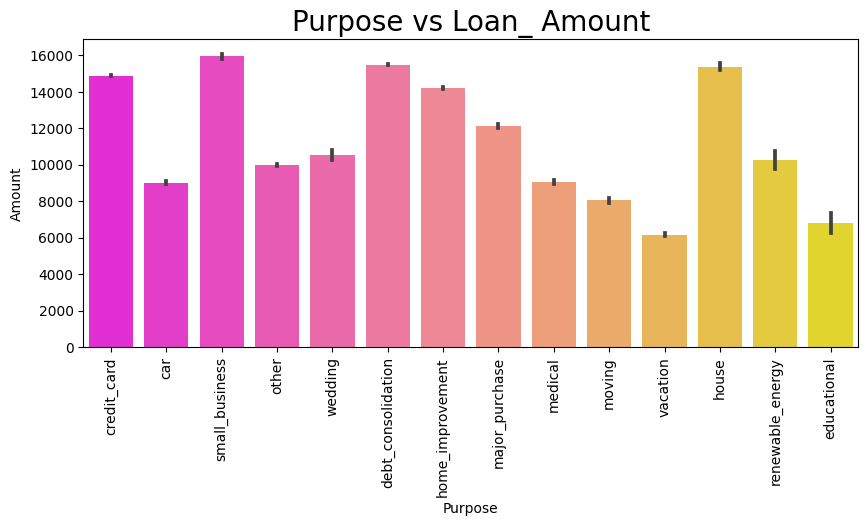

In [25]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=data, x="purpose", y='loan_amnt', palette='spring')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation='vertical')
plt.show()

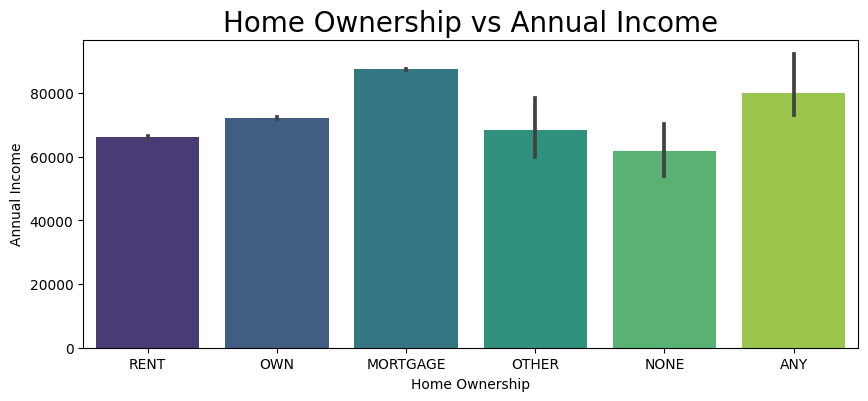

In [26]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=data,x="home_ownership",y='annual_inc',palette='viridis')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.show()

# Data Cleaning

## Dropping Some Columns

In [14]:
# These Columns Are Almost Useless
data.drop(labels=['id', 'url', 'issue_d', 'pymnt_plan', 'title', 'zip_code'], axis=1, inplace=True)

In [15]:
drop_list = []

for col in data.columns:
    should_be_dropped = data[col].isnull().mean() > 0.3
    if should_be_dropped:
        drop_list.append(col)
    print( f'{col:<30}', should_be_dropped)

loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
int_rate                       False
installment                    False
emp_title                      False
emp_length                     False
home_ownership                 False
annual_inc                     False
verification_status            False
loan_status                    False
purpose                        False
addr_state                     False
dti                            False
delinq_2yrs                    False
earliest_cr_line               False
fico_range_low                 False
fico_range_high                False
inq_last_6mths                 False
mths_since_last_delinq         True
mths_since_last_record         True
open_acc                       False
pub_rec                        False
revol_bal                      False
revol_util                     False
total_acc                      False
ini

In [16]:
# This Columns Has Too Many Nan Values 
data.drop(labels=drop_list, axis=1, inplace=True)

## Numeric Columns

In [17]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number'])

In [18]:
for col in numeric_columns:
    data[col] = data[col].fillna( data[col].mode()[0] )
    num_na = data[col].isna().sum()

## Non Numeric Columns

In [19]:
for col in data.columns:
    if col in numeric_columns:
        continue
    else:
        num_unique = len(np.unique(data[col].astype(str)))
        print( f'{col:<30}', num_unique)    
        data[col] = data[col].fillna( data[col].mode()[0] )

term                           2
int_rate                       684
emp_title                      456677
emp_length                     12
home_ownership                 6
verification_status            3
loan_status                    2
purpose                        14
addr_state                     51
earliest_cr_line               763
revol_util                     1407
initial_list_status            2
last_pymnt_d                   155
last_credit_pull_d             159
application_type               2
hardship_flag                  3
debt_settlement_flag           2


In [20]:
print(np.unique(data['term'].astype(str)))
data['term'] = data['term'].map({ ' 36 months':0, ' 60 months':1} )
print(np.unique(data['term'].astype(str)))

[' 36 months' ' 60 months']
['0' '1']


In [21]:
print(np.unique(data['emp_length'].astype(str)))
data['emp_length'] = data['emp_length'].map({  '< 1 year'  :1,
                                               '1 year'    :2,
                                               '2 years'   :3,
                                               '3 years'   :4,
                                               '4 years'   :5,
                                               '5 years'   :6,
                                               '6 years'   :7,
                                               '7 years'   :8,
                                               '8 years'   :9,
                                               '9 years'   :10,
                                               '10+ years' :11,})
data['emp_length'] = data['emp_length'].replace(np.nan, 0)
print(np.unique(data['emp_length']))

['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
[ 1  2  3  4  5  6  7  8  9 10 11]


In [22]:
data = pd.get_dummies(data, columns=['home_ownership', 
                                     'verification_status', 
                                     'purpose', 
                                     'addr_state',
                                     'initial_list_status',
                                     'application_type',], drop_first=True)

data['int_rate'          ] = data['int_rate'          ].astype('str').str.rstrip('%').astype('float') / 100.0
data['revol_util'        ] = data['revol_util'        ].astype('str').str.rstrip('%').astype('float') / 100.0
data['last_pymnt_d'      ] = data['last_pymnt_d'      ].astype('str').str.split('-').str[1].astype(int) 
data['last_credit_pull_d'] = data['last_credit_pull_d'].astype('str').str.split('-').str[1].astype(int) 
data['earliest_cr_line'  ] = data['earliest_cr_line'  ].astype('str').str.split('-').str[1].astype(int)

In [23]:
data['loan_status'] = data['loan_status'].map({ 'Charged Off':0, 'Fully Paid':1} )
data['hardship_flag'] = data['hardship_flag'].map({ 'N':0, 'Y':1} )
data['debt_settlement_flag'] = data['debt_settlement_flag'].map({ 'N':0, 'Y':1} )

In [24]:
data.isna().sum().sum()

0

In [25]:
"""
"Principal received to date" is a financial term commonly used
in lending and investment contexts. It refers to the total amount
of principal that has been paid back to the lender or investor up to a specific point in time. 
"""
# This Column Must Be Deleted Since It will Leak information that how much of the debt is payed back.
# A Simple Classifier can get more than 99% accuracy only with this feature.
data = data.drop( ['total_rec_prncp'], axis=1)

In [26]:
"""
debt_settlement_flag: lags whether or not the borrower, who has charged-off, is working with a debt-settlement company.

This Feature Leak Information.
"""
data = data.drop( ['debt_settlement_flag'], axis=1)

In [27]:
# We can not use dummy variables to represnt this column since it has
data = data.drop( ['emp_title'], axis=1)
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,5000.0,5000.0,4975.0,0,0.1065,162.87,11,24000.0,1,27.65,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,2500.0,2500.0,1,0.1527,59.83,1,30000.0,0,1.00,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,2400.0,2400.0,0,0.1596,84.33,11,12252.0,1,8.72,...,False,False,False,False,False,False,False,False,False,False
3,10000.0,10000.0,10000.0,0,0.1349,339.31,11,49200.0,1,20.00,...,False,False,False,False,False,False,False,False,False,False
4,3000.0,3000.0,3000.0,1,0.1269,67.79,2,80000.0,1,17.94,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,24000.0,24000.0,24000.0,1,0.2399,690.30,1,107000.0,0,11.65,...,False,False,False,False,False,False,False,False,False,False
105447,10000.0,10000.0,10000.0,0,0.0799,313.32,11,65000.0,1,19.55,...,False,False,False,False,False,False,False,False,True,False
105448,10050.0,10050.0,10050.0,0,0.1699,358.26,9,37000.0,0,20.56,...,False,False,True,False,False,False,False,False,True,False
105449,6000.0,6000.0,6000.0,0,0.1144,197.69,6,41000.0,1,19.99,...,False,False,False,False,False,False,False,False,True,False


# Propose at least two possible modeling approaches

**1. Logistic Regression**: Logistic regression is a simple yet powerful statistical method used for binary classification problems. It models the probability that a given input belongs to a particular class (e.g., loan default or not).


**2. Gradient Boosting Machines (GBM)**: Gradient Boosting Machines, including popular implementations like XGBoost, LightGBM, and CatBoost, are powerful ensemble methods that build multiple decision trees sequentially, where each tree corrects the errors of the previous one. They are well-suited for complex datasets with non-linear relationships.


**3. Random Forests**: Random forests are an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. They are designed to correct for overfitting in individual decision trees.


**4. Support Vector Machines (SVM)**: Support Vector Machines (SVM) are supervised learning models used for classification and regression analysis. They work well for high-dimensional data and are effective when the number of dimensions exceeds the number of samples.



**5. Neural Networks**: Neural networks, especially deep learning models, are capable of capturing complex patterns and interactions in the data. They are highly flexible and can model both linear and non-linear relationships.


**6. k-Nearest Neighbors (k-NN)**: k-Nearest Neighbors is a non-parametric method used for classification and regression. It classifies a data point based on the majority class among its k nearest neighbors.


In [ ]:
"""
KNN, GBM, and RF are Slow. 
Logistic Regression, SVM, and Naive Bayes are fast.

Logistic Regression and Tree Based Methods Are Better in 
order to find out which feature is more important.

Boosting is not necessary since we have a ton of data.
"""

# Choose one of the above approaches and implement your classifier

In [35]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


X = data.drop(['loan_status'], axis=1)
y = data[['loan_status']]


# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transfrom
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [36]:
import time
import sklearn
from sklearn import metrics
from tqdm import tqdm_notebook as tqdm
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


def forward_selection(X_train, Y_train, X_test, Y_test):
    start_time = time.time()
    Forward_Features = []
    Forward_CCR_list = []

    # Models
    clf = GaussianNB()
    #clf = SVC(kernel = 'rbf')
    #clf = RandomForestClassifier(random_state=0)
    #clf = DecisionTreeClassifier(random_state=0)
    #clf = MLPClassifier(random_state=0, shuffle=False, activation='logistic', learning_rate='adaptive', max_iter=20)

    for i in tqdm( range(12) ): # range(X.columns.size)
        # Initalization
        Max_CCR = 0;
        Best_feature_of_this_iteration_RF = None;

        # Go Until The is No Feature To Add
        for feature in tqdm(X_train.columns):
            # Initalization
            CCR = 0;
            # IF we added This Feature Before Ignore it and Go to Next Feature.
            if feature in Forward_Features:
                continue

            # Add the New Feature
            temp_features = Forward_Features.copy()
            temp_features.append(feature)

            # Extract These New Temporary Featrues From Train and Test set.
            X_train_temp_features = X_train[temp_features]
            X_test_temp_features  = X_test [temp_features]

            # Do The Following Process With Every Model
            # Train The Model
            clf.fit(X_train_temp_features, Y_train)

            # Do Prediction With Them
            Y_pred_temp_features = clf.predict(X_test_temp_features)

            # Getting The Accuracy
            CCR += accuracy_score(Y_pred_temp_features, Y_test)

            # See If The Feature Is good Enough
            if CCR > Max_CCR: Max_CCR = CCR; Best_feature_of_this_iteration = feature;

            Best_feature_of_this_iteration = Best_feature_of_this_iteration
            Max_CCR = Max_CCR

            
        Forward_Features.append( Best_feature_of_this_iteration )
        Forward_CCR_list.append( Max_CCR )
        print(Best_feature_of_this_iteration, Max_CCR)

    taken_time = round(time.time() - start_time, 5)
    print("time: ", taken_time )
    return Forward_Features, Forward_CCR_list

In [37]:
import warnings
warnings.filterwarnings('ignore')

# This Takes a Long Time So I interupted it.
forward_selection(X_train, y_train, X_test, y_test)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

25 0.9466600967568536


  0%|          | 0/146 [00:00<?, ?it/s]

31 0.9498548647195844


  0%|          | 0/146 [00:00<?, ?it/s]

28 0.9516412829242071


  0%|          | 0/146 [00:00<?, ?it/s]

105 0.9545063608672281


  0%|          | 0/146 [00:00<?, ?it/s]

73 0.9601809711521233


  0%|          | 0/146 [00:00<?, ?it/s]

3 0.9636140476617093


  0%|          | 0/146 [00:00<?, ?it/s]

21 0.9681974556531088


  0%|          | 0/146 [00:00<?, ?it/s]

2 0.969858448306755


  0%|          | 0/146 [00:00<?, ?it/s]

1 0.9712345457803261


  0%|          | 0/146 [00:00<?, ?it/s]

0 0.9719853072925999


  0%|          | 0/146 [00:00<?, ?it/s]

22 0.9733363196559757


  0%|          | 0/146 [00:00<?, ?it/s]

5 0.9746729976706683
time:  680.44586


([25, 31, 28, 105, 73, 3, 21, 2, 1, 0, 22, 5],
 [0.9466600967568536,
  0.9498548647195844,
  0.9516412829242071,
  0.9545063608672281,
  0.9601809711521233,
  0.9636140476617093,
  0.9681974556531088,
  0.969858448306755,
  0.9712345457803261,
  0.9719853072925999,
  0.9733363196559757,
  0.9746729976706683])

In [ ]:
# "post charge off gross recovery" is one of the most important features, after "Principal received to date"

# last_fico_range_low: The lower boundary range the borrower’s last FICO pulled belongs to.

# Most of These Top Features Didn't Even Came Up in the Correlation Matrix.

In [38]:
# Train a machine learning model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    108676
           1       1.00      1.00      1.00    449424

    accuracy                           1.00    558100
   macro avg       0.99      0.99      0.99    558100
weighted avg       1.00      1.00      1.00    558100



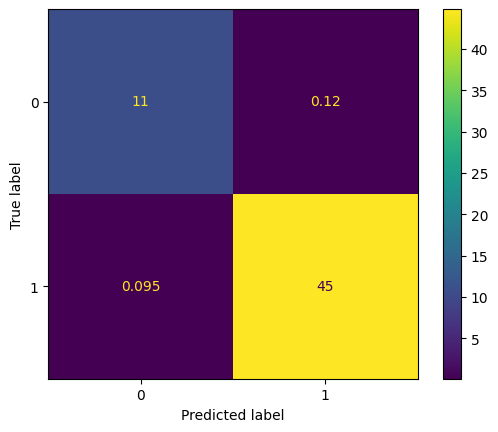

In [39]:
cm = confusion_matrix(y_test, y_pred) / 10000

cm_display  = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
# Since We Get Good accuracy, Dimension Reduction Methods are not necessary.

### Some Extra Models for the Sake of exploration

In [40]:
clf = GaussianNB()

clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85    110160
           1       0.96      0.96      0.96    447940

    accuracy                           0.94    558100
   macro avg       0.91      0.91      0.91    558100
weighted avg       0.94      0.94      0.94    558100



In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# Assuming you have X_train, y_train, X_test, y_test already defined

# Calculate class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.values)
# class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model with class weights
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2,) #class_weight=class_weight_dict)

# Predictions
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

Epoch 1/2
32556/32556 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.9839 - loss: 0.0447 - val_accuracy: 0.9969 - val_loss: 0.0126
Epoch 2/2
32556/32556 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.9964 - loss: 0.0126 - val_accuracy: 0.9968 - val_loss: 0.0110
17441/17441 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    108905
           1       1.00      1.00      1.00    449195

    accuracy                           1.00    558100
   macro avg       1.00      0.99      1.00    558100
weighted avg       1.00      1.00      1.00    558100



In [56]:
! pip install xgboost

In [57]:
import xgboost as xgb
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight


# Calculate the class weight for the positive class
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train.values.reshape(-1))
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
scale_pos_weight = class_weight_dict[1] / class_weight_dict[0]

clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', scale_pos_weight=scale_pos_weight)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108493
           1       1.00      1.00      1.00    449607

    accuracy                           1.00    558100
   macro avg       1.00      1.00      1.00    558100
weighted avg       1.00      1.00      1.00    558100



In [ ]:
# This Takes a Lot of Time since knn must check what are the closest points in this large dataset.

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

In [59]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    108935
           1       1.00      1.00      1.00    449165

    accuracy                           1.00    558100
   macro avg       0.99      0.99      0.99    558100
weighted avg       1.00      1.00      1.00    558100



## How To Explain Our Model

In [ ]:
"""
It is obvious that we can plot the tree when we use decision tree or see
which features are more important with forward selection and which are useless
with backward selection or see the correlation to get what features are better
independent of others. But there are other methods too which I like to explain:

1. LIME (Local Interpretable Model-agnostic Explanations)

    LIME is a technique that explains the predictions of any machine learning classifier by approximating it locally with an interpretable model. It perturbs the input data and observes the resulting predictions to understand the behavior of the model.

    Pros:
        Model-agnostic.
        Provides local explanations.

    Cons:
        Computationally intensive for large datasets.
        Explanations are only valid locally.



2. SHAP (SHapley Additive exPlanations)

    SHAP values provide a unified measure of feature importance based on cooperative game theory. It explains the prediction of an instance by computing the contribution of each feature to the prediction.

    Pros:
        Model-agnostic.
        Consistent and accurate feature importance.

    Cons:
        Computationally expensive for large models and datasets.


    
3. Feature Importance (Gini Importance, Gain, etc.)

    Feature importance methods compute the importance of each feature in making predictions. These are often used in tree-based models like Random Forest, Gradient Boosting, and XGBoost.

    Pros:
        Fast and easy to compute.
        Useful for identifying important features.

    Cons:
        Model-specific (e.g., works best with tree-based models).
        Does not provide local explanations.



4. Partial Dependence Plots (PDP)

    PDPs show the relationship between a feature and the predicted outcome of a machine learning model. They help visualize the effect of a feature on the model’s predictions.

    Pros:
        Model-agnostic.
        Easy to interpret.

    Cons:
        Assumes independence of features.
        Can be misleading if features are highly correlated.
        
        
5. ALE (Accumulated Local Effects)

    ALE plots show the accumulated effect of a feature on the prediction by averaging the changes in the predictions over the feature values. It’s a more advanced version of PDP that handles correlated features better.

    Pros:
        Handles correlated features.
        Model-agnostic.

    Cons:
        More complex to understand and interpret compared to PDP.


6. Counterfactual Explanations

    Counterfactual explanations identify the minimal changes to the input features required to change the prediction to a desired outcome. This is useful for understanding decision boundaries.

    Pros:
        Provides actionable insights.
        Model-agnostic.

    Cons:
        Can be computationally expensive.
        

7. ICE (Individual Conditional Expectation) Plots

    ICE plots visualize the dependence of the predicted outcome on a feature for individual instances. They show how each instance's prediction changes when a feature value changes.

    Pros:
        Provides individual-level insights.
        Complements PDP.

    Cons:
        Can be complex to interpret for large datasets.
        
    
Notes: Some of these Methods are not well implimented or documented, so we can not calcualte them.
"""

<Axes: >

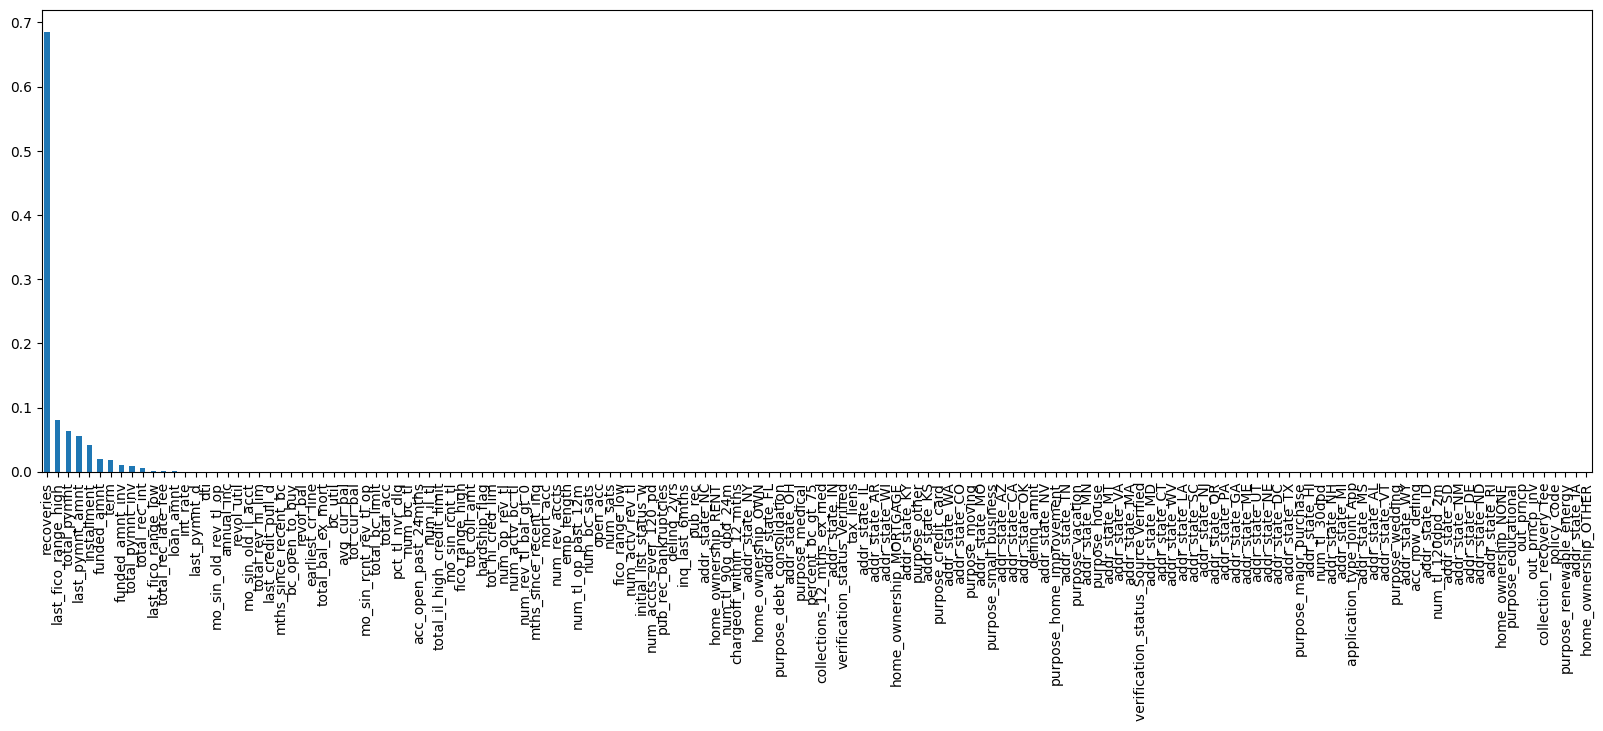

In [64]:
plt.figure(figsize=(20, 6))

feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar')

### Shap

In [ ]:
# This is computationally too expensive to be run on a kaggle notebook.

In [ ]:
%%capture
%pip install shap

import shap

In [ ]:
explainer = shap.KernelExplainer(clf.predict, X_train[:100])

In [ ]:
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
shap.waterfall_plot(shap_values[0])

# Explain your model in terms of the classifier’s features

# Discuss additional steps you would take if you had more time or resources

If I had more time, I would:

    1. try exploring missing values more
    
    2. try to come up with more understandable plots since Data Science is about understanding data so visualization is impotant
    
    3. use more time series analysis related stuff, like try converting and combining 'last_pymnt_d' with other columns (feature engineering) in order to see if there is a pattern there
    
    4. Explore emp_title more
    
    5. Cleaner Code (Functional Programming)
    
    6. Reviewing litreture on the subject
    
    7. Creating a robust pipeline
    
    
    

# Discuss the scalability of your solution

When assessing the scalability of a machine learning model, several key characteristics should be analyzed. Scalability refers to the model's ability to handle increasing amounts of data and computational demands efficiently. Here are the primary characteristics to consider:

1. Computational Complexity
2. Memory Usage
3. Parallelizability
4. Data Handling Capabilities
5. Algorithm Complexity
6. Hardware Utilization
7. Deployment Considerations
8. Data Preprocessing and Feature Engineering
9. Resilience and Fault Tolerance


I have tried to make use of fast models with features that can be collected before giving out a loan so my solution is actually scalable, pretty fast, can be used in production, robust to noise. Even with more data and the data that come in every day we can retrain the model in matter of seconds and the inference time is pretty low. 

Since I Used Logistic Regression First, and it was pretty fast and accurate, I would analyze it.

Training Time: Logistic Regression typically has a linear time complexity with respect to the number of training samples and features

Inference Time: The inference time is also linear.

Model Size: The size of a Logistic Regression model is relatively small compared to more complex models like neural networks.

Training Parallelization: Some implementations of Logistic Regression (like those in scikit-learn) do not natively support parallel training. However, distributed implementations (such as those in Apache Spark's MLlib) can handle parallel training.

Inference Parallelization: Inference can be easily parallelized since predictions for different samples are independent.

Batch Processing: Logistic Regression can be trained and inferred using batch processing, which helps in handling large datasets.

Streaming Data: Online learning variants (like Stochastic Gradient Descent) can handle streaming data, making Logistic Regression adaptable to real-time data.
    
    
Scalability of Algorithm: Logistic Regression is inherently scalable due to its linear nature

Hyperparameter Tuning: Tuning hyperparameters like regularization strength can be computationally less intensive compared to tuning parameters of more complex models.


GPU/TPU Utilization: Logistic Regression does not typically leverage GPUs/TPUs

Distributed Computing: Distributed computing frameworks like Apache Spark can be used to scale Logistic Regression across multiple machines.

Scalability of Preprocessing: Standard scaling and normalization techniques can be applied efficiently

Pipeline Integration: Preprocessing pipelines can be easily integrated into the model serving process.

Failure Handling: Logistic Regression training processes can be checkpointed and resumed, especially in distributed frameworks.



 # Find a way to relate your predictions to the local/global shape of the dataset

In [79]:
# I have Discussed this in the "How to Explain Our Model" Section